<h1/><center/><span style="color:crimson">WALMART CASE STUDY</span>

## Problem Statement:
### To understand the spending habits of Walmart Customers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


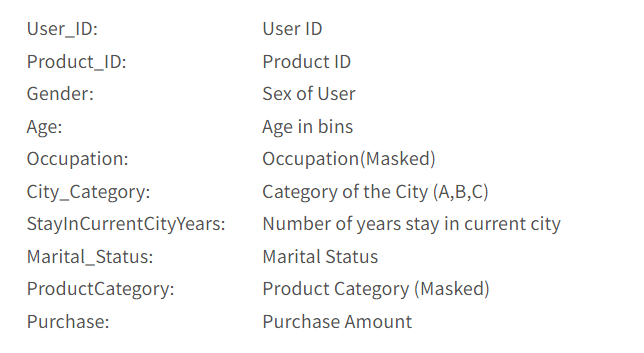

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
print("Shape of data")
print("No of rows : ", df.shape[0])
print("No of columns : ", df.shape[1])

Shape of data
No of rows :  550068
No of columns :  10


In [4]:
# Basic information and statistical description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
df.describe(include = ['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [7]:
# Check for null values  -- No NULL values present in dataset

df.isnull().sum()/len(df)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

### Basic univariate analysis

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

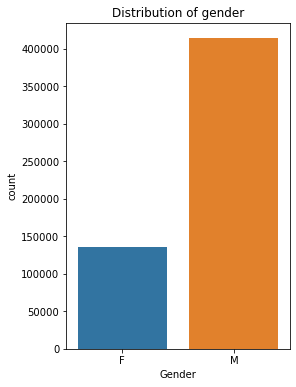

In [10]:
plt.figure(figsize = (4,6))
sns.countplot(x="Gender", data=df)
plt.title("Distribution of gender")
plt.show()

In [11]:
# Age bins
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

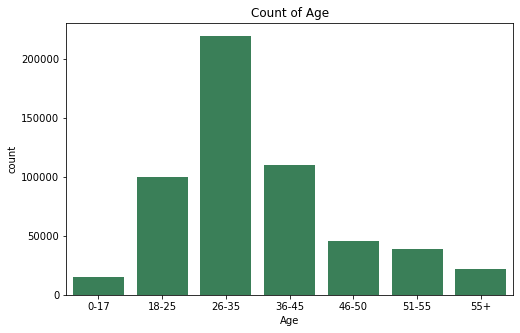

In [12]:
plt.figure(figsize = (8,5))
plt.title("Count of Age")
sns.countplot(x= "Age", data=df, color="seagreen", order = ["0-17","18-25","26-35","36-45","46-50","51-55","55+"])
plt.show()

In [13]:
df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

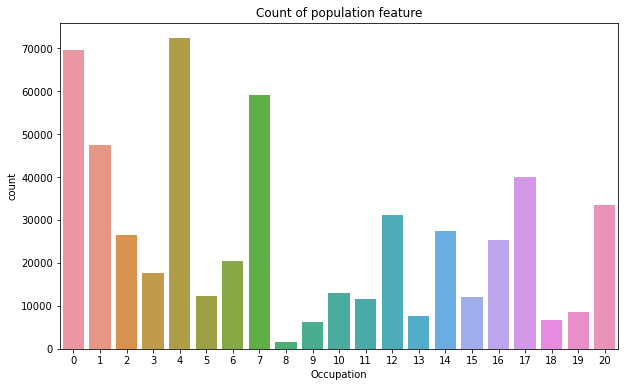

In [14]:
plt.figure(figsize = (10,6))
plt.title("Count of population feature")
sns.countplot(x = "Occupation",data=df)
plt.show()

In [15]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

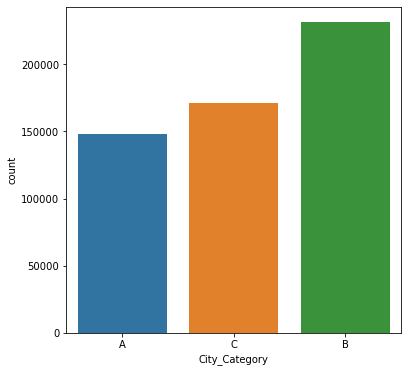

In [16]:
plt.figure(figsize = (6,6))
sns.countplot(x="City_Category", data =df)
plt.show()

In [17]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

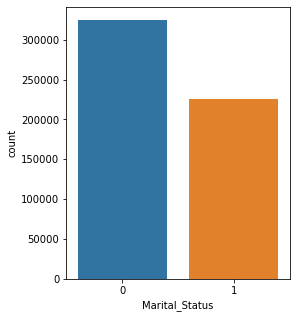

In [18]:
plt.figure(figsize = (4,5))
sns.countplot(x="Marital_Status", data =df)
plt.show()

In [19]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

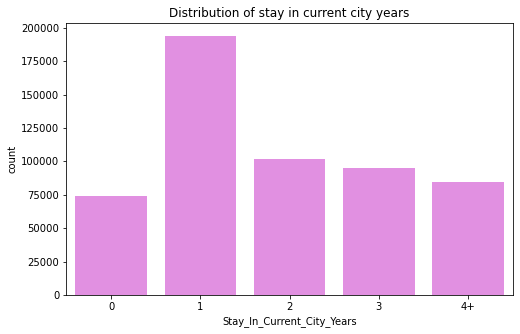

In [22]:
plt.figure(figsize = (8,5))
plt.title("Distribution of stay in current city years")
sns.countplot(x="Stay_In_Current_City_Years", data =df, order =["0","1","2","3","4+"], color="violet")
plt.show()

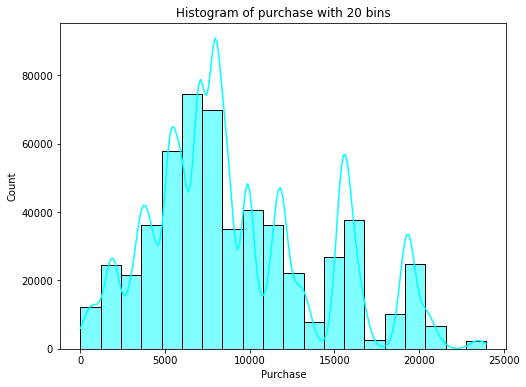

In [23]:
plt.figure(figsize = (8,6))
plt.title("Histogram of purchase with 20 bins")
sns.histplot(x="Purchase", data = df, bins = 20, kde=True, color="cyan")
plt.show()

## Multivariate analysis

In [24]:
df_gender = df.groupby("Gender")
df_gender.mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [25]:
df_gender.median()["Purchase"]

Gender
F    7914
M    8098
Name: Purchase, dtype: int64

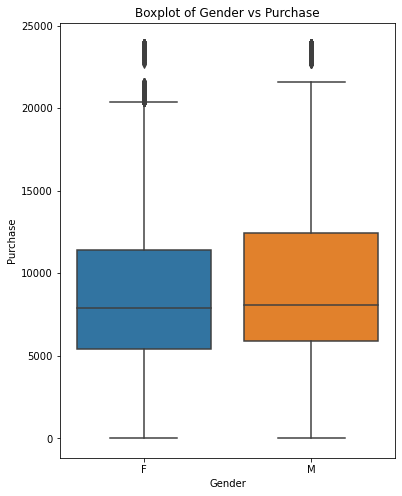

In [27]:
plt.figure(figsize = (6,8))
plt.title("Boxplot of Gender vs Purchase")
sns.boxplot(x="Gender", y="Purchase", data=df)
plt.show()

<b/>The median spend of males and females are very close to each other with the male median spend being slightly higher.

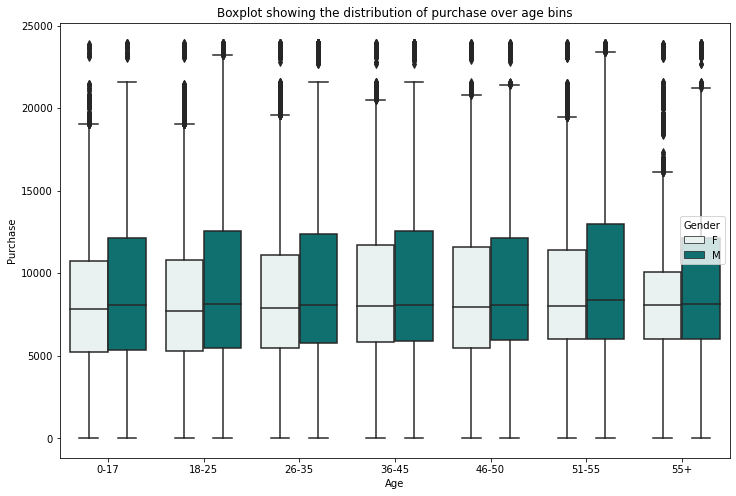

In [32]:
plt.figure(figsize = (12,8))
plt.title("Boxplot showing the distribution of purchase over age bins")
sns.boxplot(x="Age", y="Purchase", hue ="Gender", data=df, order = ["0-17","18-25","26-35","36-45","46-50","51-55","55+"], color="teal")
plt.show()

<b/>Insights from the the above plot:<br>
- For all the age bins, median spend for males is slightly higher than females
- A lot of females spend amounts much higher than the median spend (more number of outliers)
- Median purchase of males belonging to ages 18-25 and 51-55 are higher

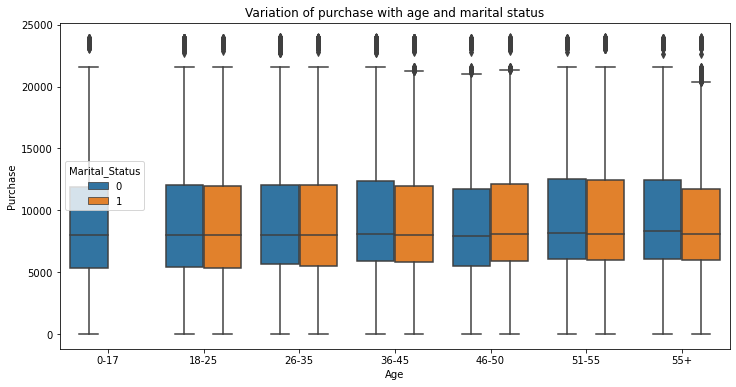

In [33]:
plt.figure(figsize = (12,6))
plt.title("Variation of purchase with age and marital status")
sns.boxplot(x="Age", y="Purchase", hue ="Marital_Status", data=df, order = ["0-17","18-25","26-35","36-45","46-50","51-55","55+"])
plt.show()

In [35]:
df.groupby("City_Category").median().reset_index().sort_values("Purchase",ascending = False)

,City_Category,User_ID,Occupation,Marital_Status,Product_Category,Purchase
2,C,1003119,7,0,5,8585
1,B,1003129,7,0,5,8005
0,A,1002986,6,0,5,7931


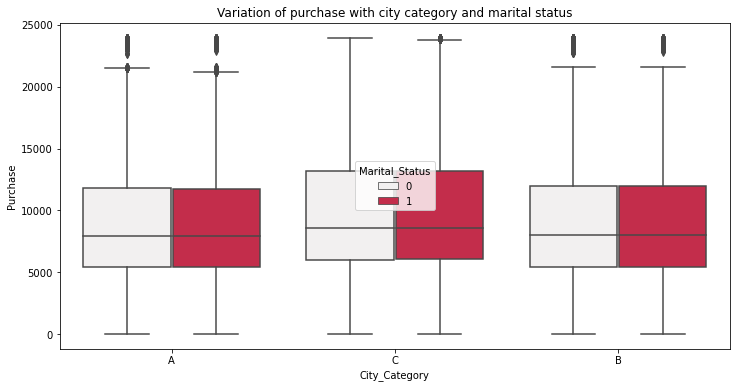

In [39]:
plt.figure(figsize = (12,6))
plt.title("Variation of purchase with city category and marital status")
sns.boxplot(x="City_Category", y="Purchase", hue ="Marital_Status", data=df, color="crimson")
plt.show()

<b/>Insights from above boxplot:
 - The median spend of customers belonging to city C is higher than those belonging to city A or B
 - Marital status does not seem to have a heavy impact on the median purchase of customers

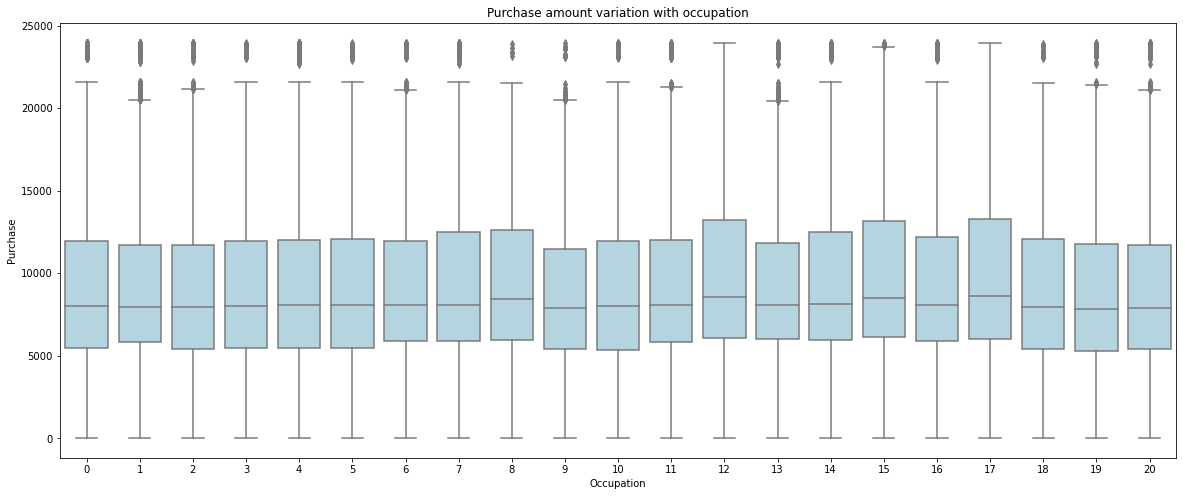

In [44]:
plt.figure(figsize = (20,8))
plt.title("Purchase amount variation with occupation")
sns.boxplot(x="Occupation", y="Purchase", data=df, color="lightblue")
plt.show()

In [45]:
df.groupby("Occupation").median().reset_index().sort_values("Purchase",ascending = False)[:4]

,Occupation,User_ID,Marital_Status,Product_Category,Purchase
17,17,1003336.0,0.0,5.0,8635.0
12,12,1002932.0,0.0,5.0,8569.0
15,15,1003693.0,0.0,5.0,8513.0
8,8,1001736.0,1.0,5.0,8419.5


<b/> From the boxplot and grouped data above we observe that customers belonging to occupation categories 17,12,15 and 8 spend more

<Figure size 288x288 with 0 Axes>

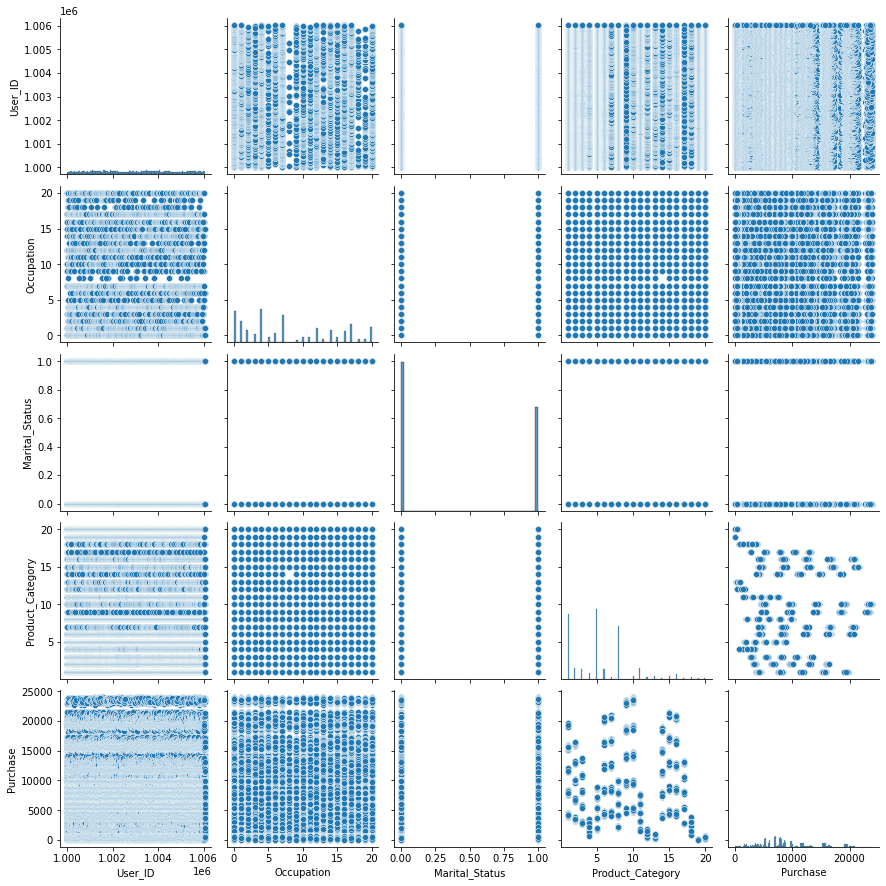

In [46]:
#pairplot
plt.figure(figsize = (4,4))
sns.pairplot(data=df)

In [47]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


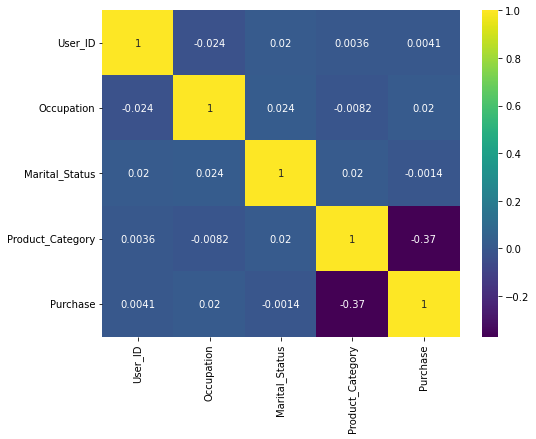

In [203]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

<b/> From the pairplot and heatmaps above it is evident that there is not much meaningful correlation among the various features

<br>

------------------------------------------------------------------------------------------------------------------------------------------------------------

<br>

## Estimation of average using CLT and computing Confidence Intervals using Bootstrapping

In [48]:
# helper function for outlier detection

def outlier_detector(data):
    outliers = []

    data= np.array(data)
    q3 = np.percentile(data,75)
    q1 = np.percentile(data, 25)

    iqr = q3-q1

    upper = q3+1.5*iqr
    lower = q1-1.5*iqr

    for ele in data:
        if ele<lower or ele>upper:
            outliers.append(ele)
    return outliers

In [49]:
purchase_outliers = outlier_detector(df["Purchase"])
len(df.loc[df["Purchase"].isin(purchase_outliers)])/len(df)

0.004866671029763593

In [50]:
# Since the fraction of outliers for purchase column is very low, they are removed

df = df.loc[~df["Purchase"].isin(purchase_outliers)]

In [51]:
# Dividing the dataset into male data and female data to aid in further analysis

female_df = df.loc[df["Gender"] == "F"]
male_df = df.loc[df["Gender"] == "M"]

len(female_df),len(male_df)

(135220, 412171)

##### Bootstrapping to calculate confidence intervals

In [52]:
#Helper function to calulate sample means using bootstrapping

def bootstrap(num_samples,df):
    sample_means = []
    
    for i in range(1000):
        purchase_list = list(df["Purchase"].sample(n=num_samples,replace=True)) #randomly sample a number of data from purchase column
        sample_means.append(np.mean(purchase_list))
        
    return sample_means

<b/> Taking different number of samples from the MALE dataset and computing the sample mean for each. The histograms from these sample means are then used to compute 90%, 95% and 99% confidence intervals for the average male purchase amount

Taking 100000, 10000, 1000 and 100 samples to observe the variation of histogram of sample means

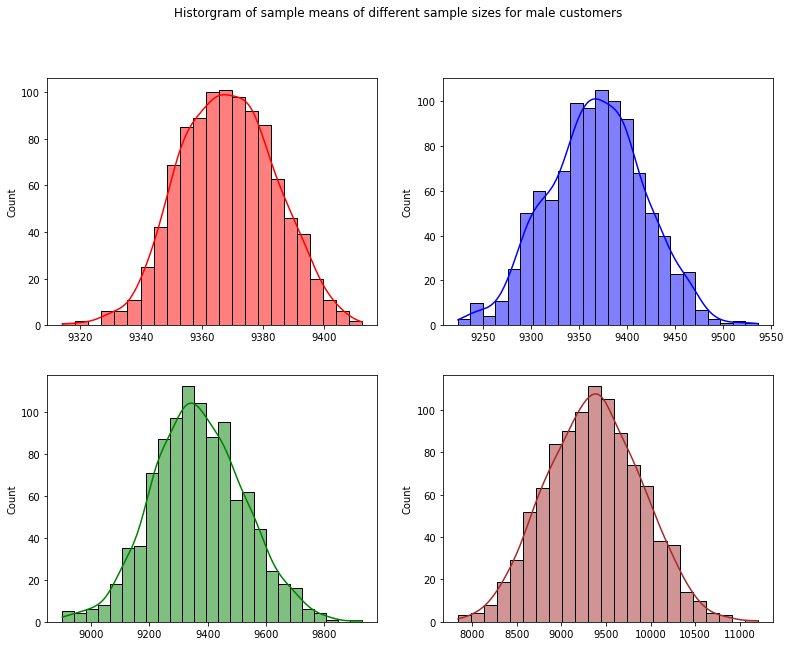

In [75]:
fig,axes = plt.subplots(2,2, figsize= (13,10))
plt.suptitle("Historgram of sample means of different sample sizes for male customers")
sns.histplot(bootstrap(100000,male_df),ax = axes[0,0], color='r',kde=True)
sns.histplot(bootstrap(10000,male_df),ax = axes[0,1], color = 'b',kde=True)
sns.histplot(bootstrap(1000,male_df),ax = axes[1,0], color='g',kde=True)
sns.histplot(bootstrap(100,male_df),ax = axes[1,1], color = 'brown', kde= True)

plt.show()

By the law of large numbers the more number of samples we take the better our chances for the sample mean to be probabilistically close to the population mean. Hence the confidence intervals for the population mean is calculated using the histogram of 100000 samples (Red).

In [76]:
num_samples = 100000
sample_means = bootstrap(num_samples,male_df)

In [77]:
low,high = np.round(np.percentile(np.array(sample_means),[5,95]),2)
print("The 90% confidence interval for population mean is: [",low,",",high,"]")

The 90% confidence interval for population mean is: [ 9341.48 , 9394.01 ]


In [78]:
low,high = np.round(np.percentile(np.array(sample_means),[2.5,97.5]),2)
print("The 95% confidence interval for population mean is: [",low,",",high,"]")

The 95% confidence interval for population mean is: [ 9335.75 , 9398.02 ]


In [79]:
low,high = np.round(np.percentile(np.array(sample_means),[0.5,99.5]),2)
print("The 99% confidence interval for population mean is: [",low,",",high,"]")

The 99% confidence interval for population mean is: [ 9327.48 , 9407.55 ]


<b/> Doing similar analysis for FEMALE dataset

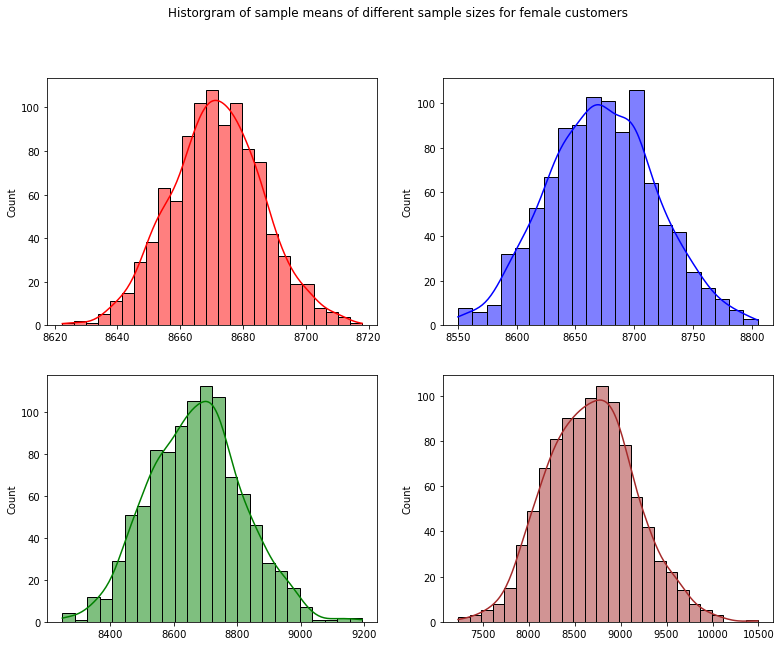

In [80]:
fig,axes = plt.subplots(2,2, figsize= (13,10))
plt.suptitle("Historgram of sample means of different sample sizes for female customers")
sns.histplot(bootstrap(100000,female_df),ax = axes[0,0], color='r',kde=True)
sns.histplot(bootstrap(10000,female_df),ax = axes[0,1], color = 'b',kde=True)
sns.histplot(bootstrap(1000,female_df),ax = axes[1,0], color='g',kde=True)
sns.histplot(bootstrap(100,female_df),ax = axes[1,1], color = 'brown', kde= True)

plt.show()

By the law of large numbers the more number of samples we take the better our chances for the sample mean to be probabilistically close to the population mean. Hence the confidence intervals for the population mean is calculated using the histogram of 100000 samples (Red).

In [137]:
num_samples = 100000
sample_means = bootstrap(num_samples,female_df)

In [138]:
low,high = np.round(np.percentile(np.array(sample_means),[5,95]),2)
print("The 90% confidence interval for population mean is: [",low,",",high,"]")

The 90% confidence interval for population mean is: [ 8646.25 , 8695.97 ]


In [139]:
low,high = np.round(np.percentile(np.array(sample_means),[2.5,97.5]),2)
print("The 95% confidence interval for population mean is: [",low,",",high,"]")

The 95% confidence interval for population mean is: [ 8641.8 , 8701.09 ]


In [140]:
low,high = np.round(np.percentile(np.array(sample_means),[0.5,99.5]),2)
print("The 99% confidence interval for population mean is: [",low,",",high,"]")

The 99% confidence interval for population mean is: [ 8633.89 , 8709.5 ]


<br>

### Estimation for Married and Unmarried customers

In [89]:
df_married = df.loc[df["Marital_Status"]==1]
df_unmarried = df.loc[df["Marital_Status"]==0]
len(df_married),len(df_unmarried)

(224149, 323242)

Taking different number of samples from the MARRIED dataset and computing the sample mean for each. The histograms from these sample means are then used to compute 90%, 95% and 99% confidence intervals for the average male purchase amount

Taking 100000, 10000, 1000 and 100 samples to observe the variation of histogram of sample means

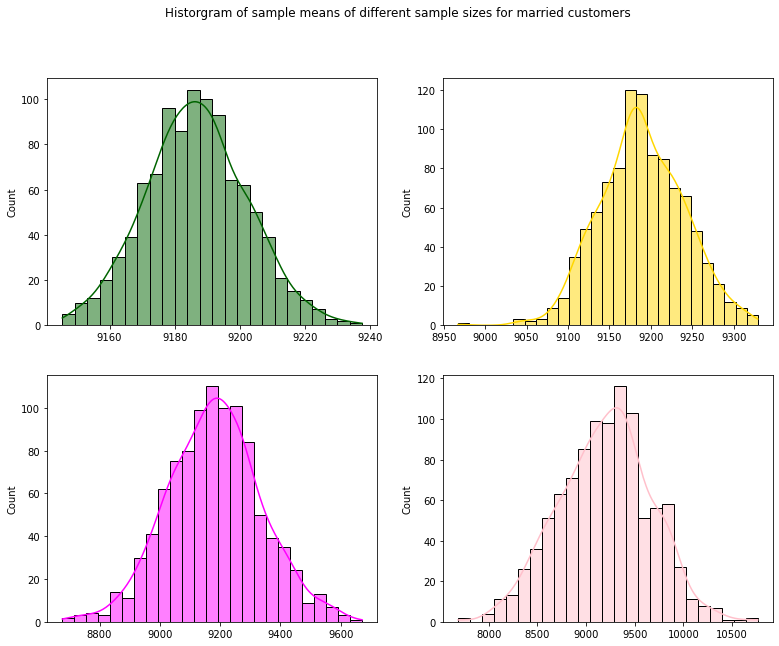

In [102]:
fig,axes = plt.subplots(2,2, figsize= (13,10))
plt.suptitle("Historgram of sample means of different sample sizes for married customers")
sns.histplot(bootstrap(100000,df_married),ax = axes[0,0], color='darkgreen',kde=True)
sns.histplot(bootstrap(10000,df_married),ax = axes[0,1], color = 'gold',kde=True)
sns.histplot(bootstrap(1000,df_married),ax = axes[1,0], color='magenta',kde=True)
sns.histplot(bootstrap(100,df_married),ax = axes[1,1], color = 'pink', kde= True)

plt.show()

By the law of large numbers the more number of samples we take the better our chances for the sample mean to be probabilistically close to the population mean. Hence the confidence intervals for the population mean is calculated using the histogram of 100000 samples (Green).

In [91]:
num_samples = 100000
sample_means = bootstrap(num_samples,df_married)

In [92]:
low,high = np.round(np.percentile(np.array(sample_means),[5,95]),2)
print("The 90% confidence interval for population mean is: [",low,",",high,"]")

The 90% confidence interval for population mean is: [ 9161.32 , 9212.77 ]


In [94]:
low,high = np.round(np.percentile(np.array(sample_means),[2.5,97.5]),2)
print("The 95% confidence interval for population mean is: [",low,",",high,"]")

The 95% confidence interval for population mean is: [ 9156.42 , 9217.42 ]


In [93]:
low,high = np.round(np.percentile(np.array(sample_means),[0.5,99.5]),2)
print("The 99% confidence interval for population mean is: [",low,",",high,"]")

The 99% confidence interval for population mean is: [ 9145.53 , 9230.0 ]


#### For UNMARRIED Customers

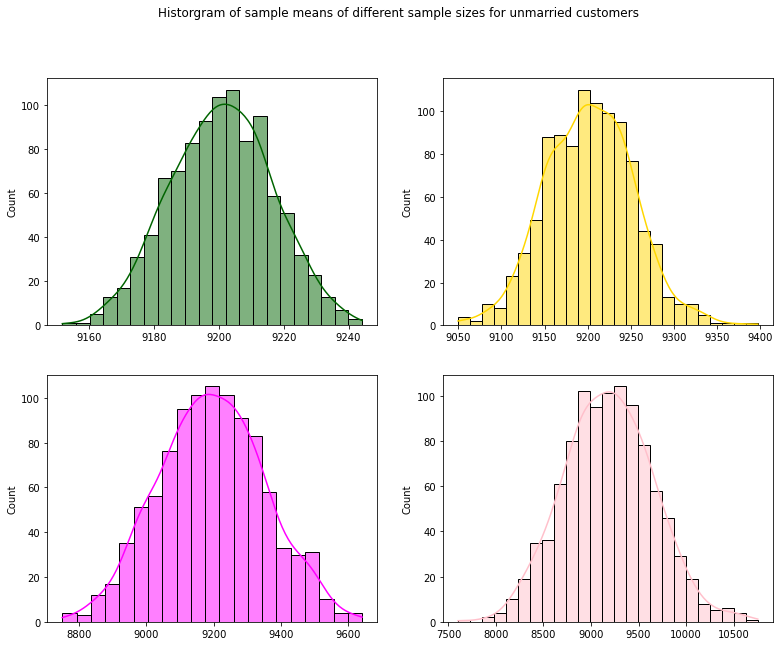

In [103]:
fig,axes = plt.subplots(2,2, figsize= (13,10))
plt.suptitle("Historgram of sample means of different sample sizes for unmarried customers")
sns.histplot(bootstrap(100000,df_unmarried),ax = axes[0,0], color='darkgreen',kde=True)
sns.histplot(bootstrap(10000,df_unmarried),ax = axes[0,1], color = 'gold',kde=True)
sns.histplot(bootstrap(1000,df_unmarried),ax = axes[1,0], color='magenta',kde=True)
sns.histplot(bootstrap(100,df_unmarried),ax = axes[1,1], color = 'pink', kde= True)

plt.show()

By the law of large numbers the more number of samples we take the better our chances for the sample mean to be probabilistically close to the population mean. Hence the confidence intervals for the population mean is calculated using the histogram of 100000 samples (Green).

In [109]:
num_samples = 100000
sample_means = bootstrap(num_samples,df_unmarried)

In [110]:
low,high = np.round(np.percentile(np.array(sample_means),[5,95]),2)
print("The 90% confidence interval for population mean is: [",low,",",high,"]")

The 90% confidence interval for population mean is: [ 9175.74 , 9227.03 ]


In [111]:
low,high = np.round(np.percentile(np.array(sample_means),[2.5,97.5]),2)
print("The 95% confidence interval for population mean is: [",low,",",high,"]")

The 95% confidence interval for population mean is: [ 9170.99 , 9233.25 ]


In [112]:
low,high = np.round(np.percentile(np.array(sample_means),[0.5,99.5]),2)
print("The 99% confidence interval for population mean is: [",low,",",high,"]")

The 99% confidence interval for population mean is: [ 9161.26 , 9239.7 ]


<br>
<br>

### Estimation for Customers belonging to different Age bins

<b/> Splitting the dataset based on the different age bins and estimating confidence intervals for each bin

In [101]:
age_0_17 = df.loc[df["Age"]=="0-17"]
age_18_25 = df.loc[df["Age"]=="18-25"]
age_26_35 = df.loc[df["Age"]=="26-35"]
age_36_45 = df.loc[df["Age"]=="36-45"]
age_46_50 = df.loc[df["Age"]=="46-50"]
age_51_55 = df.loc[df["Age"]=="51-55"]
age_55 = df.loc[df["Age"]=="55+"]

len(age_0_17),len(age_18_25),len(age_26_35),len(age_36_45),len(age_46_50),len(age_51_55),len(age_55)

(15032, 99334, 218661, 109409, 45442, 38191, 21322)

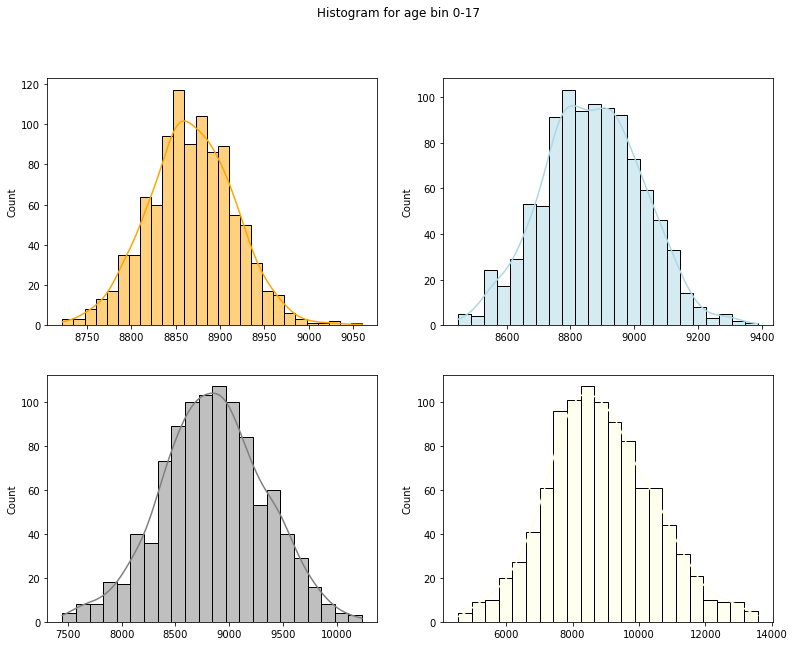

In [118]:
# for 0-17

fig,axes = plt.subplots(2,2, figsize= (13,10))
plt.suptitle("Histogram for age bin 0-17")
sns.histplot(bootstrap(10000,age_0_17),ax = axes[0,0], color='orange',kde=True)
sns.histplot(bootstrap(1000,age_0_17),ax = axes[0,1], color='lightblue',kde=True)
sns.histplot(bootstrap(100,age_0_17),ax = axes[1,0], color='grey',kde=True)
sns.histplot(bootstrap(10,age_0_17),ax = axes[1,1], color='lightyellow',kde=True)

plt.show()

By the law of large numbers the more number of samples we take the better our chances for the sample mean to be probabilistically close to the population mean. Hence the confidence intervals for the population mean is calculated using the histogram of 10000 samples (ORANGE).

In [131]:
num_samples = 10000
sample_means = bootstrap(num_samples,age_0_17)

low,high = np.round(np.percentile(np.array(sample_means),[5,95]),2)
print("The 90% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[2.5,97.5]),2)
print("The 95% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[0.5,99.5]),2)
print("The 99% confidence interval for population mean is: [",low,",",high,"]")

The 90% confidence interval for population mean is: [ 8789.55 , 8950.21 ]
The 95% confidence interval for population mean is: [ 8772.97 , 8964.32 ]
The 99% confidence interval for population mean is: [ 8755.02 , 8999.29 ]


<br>

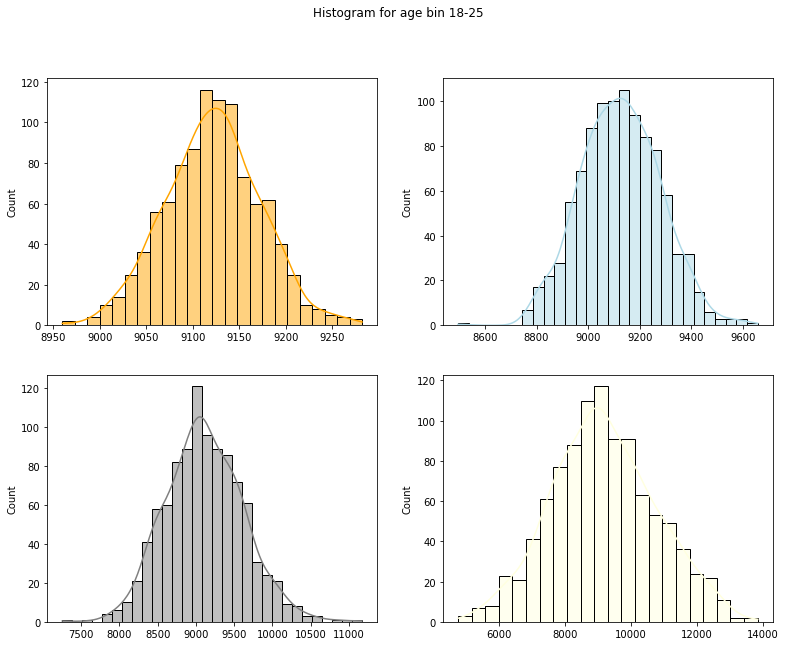

In [117]:
# for 18- 25

fig,axes = plt.subplots(2,2, figsize= (13,10))
plt.suptitle("Histogram for age bin 18-25")
sns.histplot(bootstrap(10000,age_18_25),ax = axes[0,0], color='orange',kde=True)
sns.histplot(bootstrap(1000,age_18_25),ax = axes[0,1], color='lightblue',kde=True)
sns.histplot(bootstrap(100,age_18_25),ax = axes[1,0], color='grey',kde=True)
sns.histplot(bootstrap(10,age_18_25),ax = axes[1,1], color='lightyellow',kde=True)

plt.show()

In [132]:
num_samples = 10000
sample_means = bootstrap(num_samples,age_18_25)

low,high = np.round(np.percentile(np.array(sample_means),[5,95]),2)
print("The 90% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[2.5,97.5]),2)
print("The 95% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[0.5,99.5]),2)
print("The 99% confidence interval for population mean is: [",low,",",high,"]")

The 90% confidence interval for population mean is: [ 9043.96 , 9204.63 ]
The 95% confidence interval for population mean is: [ 9029.89 , 9222.21 ]
The 99% confidence interval for population mean is: [ 8992.55 , 9254.73 ]


<br>

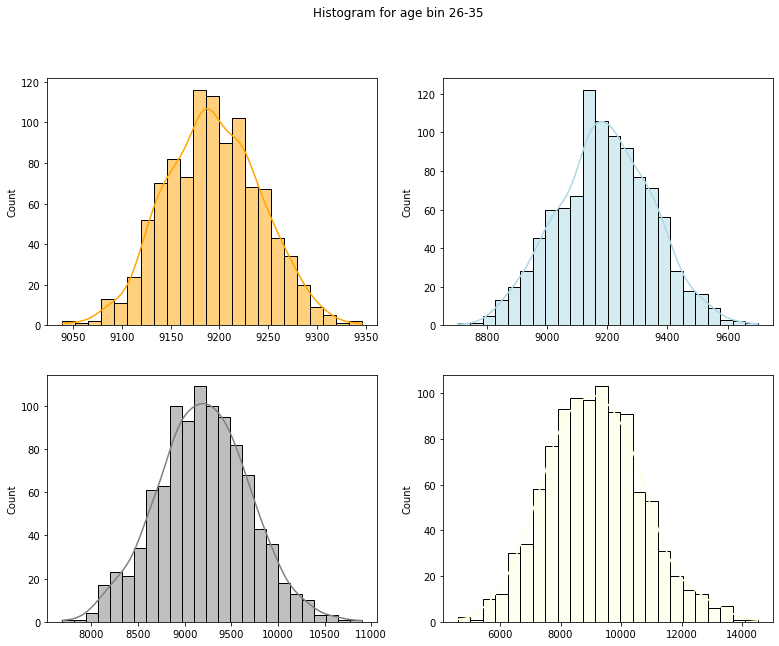

In [119]:
# for 26-35

fig,axes = plt.subplots(2,2, figsize= (13,10))
plt.suptitle("Histogram for age bin 26-35")
sns.histplot(bootstrap(10000,age_26_35),ax = axes[0,0], color='orange',kde=True)
sns.histplot(bootstrap(1000,age_26_35),ax = axes[0,1], color='lightblue',kde=True)
sns.histplot(bootstrap(100,age_26_35),ax = axes[1,0], color='grey',kde=True)
sns.histplot(bootstrap(10,age_26_35),ax = axes[1,1], color='lightyellow',kde=True)

plt.show()

In [133]:
num_samples = 10000
sample_means = bootstrap(num_samples,age_26_35)

low,high = np.round(np.percentile(np.array(sample_means),[5,95]),2)
print("The 90% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[2.5,97.5]),2)
print("The 95% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[0.5,99.5]),2)
print("The 99% confidence interval for population mean is: [",low,",",high,"]")

The 90% confidence interval for population mean is: [ 9113.09 , 9268.52 ]
The 95% confidence interval for population mean is: [ 9100.33 , 9285.17 ]
The 99% confidence interval for population mean is: [ 9068.41 , 9318.14 ]


<br>

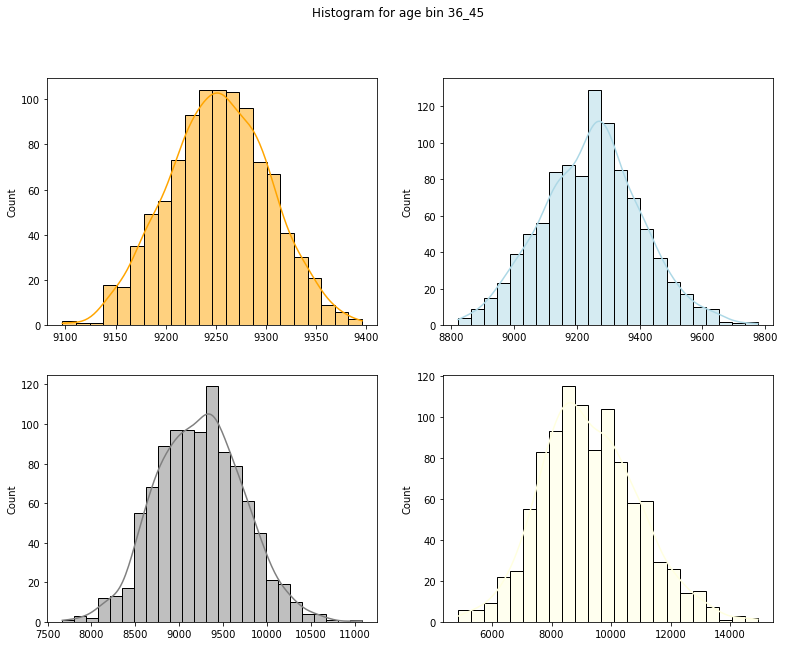

In [122]:
# for 36_45

fig,axes = plt.subplots(2,2, figsize= (13,10))
plt.suptitle("Histogram for age bin 36_45")
sns.histplot(bootstrap(10000,age_36_45),ax = axes[0,0], color='orange',kde=True)
sns.histplot(bootstrap(1000,age_36_45),ax = axes[0,1], color='lightblue',kde=True)
sns.histplot(bootstrap(100,age_36_45),ax = axes[1,0], color='grey',kde=True)
sns.histplot(bootstrap(10,age_36_45),ax = axes[1,1], color='lightyellow',kde=True)

plt.show()

In [134]:
num_samples = 10000
sample_means = bootstrap(num_samples,age_36_45)

low,high = np.round(np.percentile(np.array(sample_means),[5,95]),2)
print("The 90% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[2.5,97.5]),2)
print("The 95% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[0.5,99.5]),2)
print("The 99% confidence interval for population mean is: [",low,",",high,"]")

The 90% confidence interval for population mean is: [ 9170.58 , 9333.08 ]
The 95% confidence interval for population mean is: [ 9156.51 , 9348.96 ]
The 99% confidence interval for population mean is: [ 9124.55 , 9377.31 ]


<br>

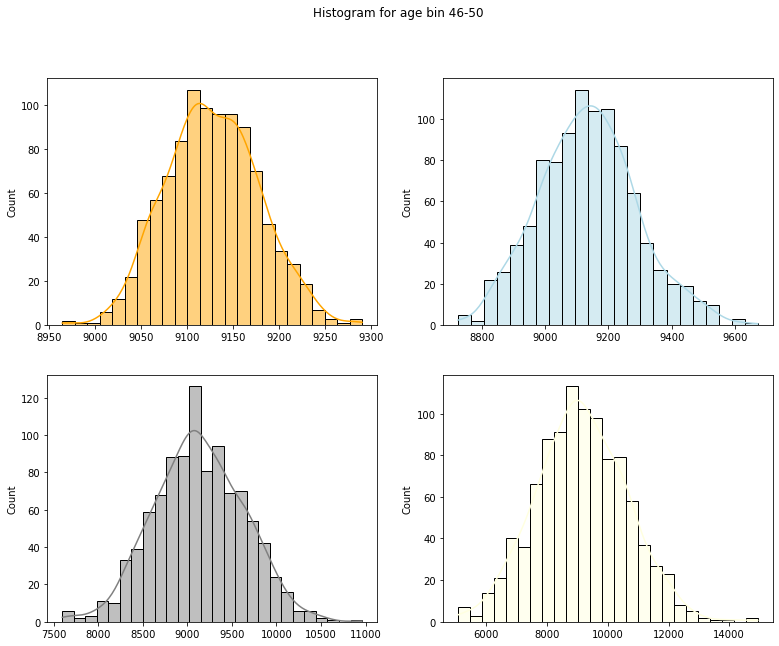

In [124]:
# for 46-50

fig,axes = plt.subplots(2,2, figsize= (13,10))
plt.suptitle("Histogram for age bin 46-50")
sns.histplot(bootstrap(10000,age_46_50),ax = axes[0,0], color='orange',kde=True)
sns.histplot(bootstrap(1000,age_46_50),ax = axes[0,1], color='lightblue',kde=True)
sns.histplot(bootstrap(100,age_46_50),ax = axes[1,0], color='grey',kde=True)
sns.histplot(bootstrap(10,age_46_50),ax = axes[1,1], color='lightyellow',kde=True)

plt.show()

In [135]:
num_samples = 10000
sample_means = bootstrap(num_samples,age_46_50)

low,high = np.round(np.percentile(np.array(sample_means),[5,95]),2)
print("The 90% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[2.5,97.5]),2)
print("The 95% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[0.5,99.5]),2)
print("The 99% confidence interval for population mean is: [",low,",",high,"]")

The 90% confidence interval for population mean is: [ 9051.21 , 9201.08 ]
The 95% confidence interval for population mean is: [ 9037.53 , 9219.8 ]
The 99% confidence interval for population mean is: [ 8997.44 , 9242.44 ]


<br>

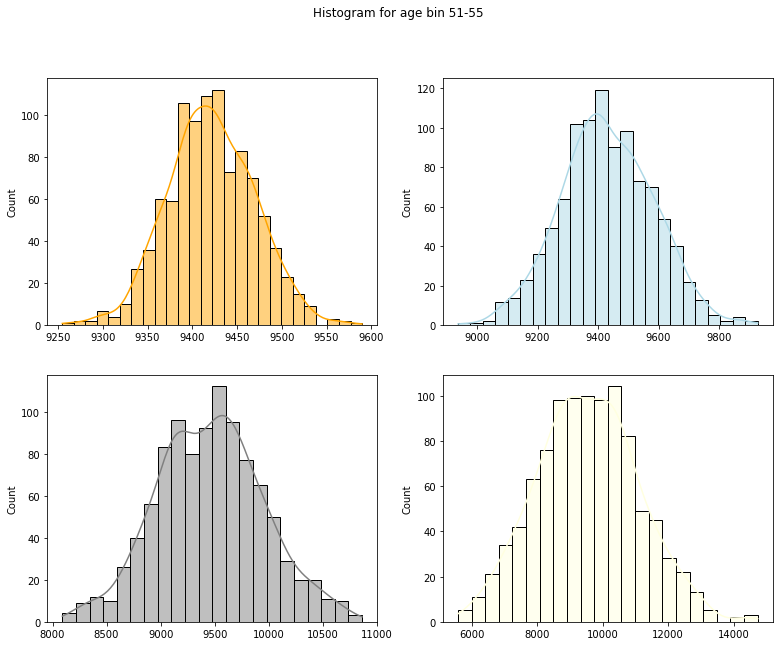

In [127]:
# for 51-55

fig,axes = plt.subplots(2,2, figsize= (13,10))
plt.suptitle("Histogram for age bin 51-55")
sns.histplot(bootstrap(10000,age_51_55),ax = axes[0,0], color='orange',kde=True)
sns.histplot(bootstrap(1000,age_51_55),ax = axes[0,1], color='lightblue',kde=True)
sns.histplot(bootstrap(100,age_51_55),ax = axes[1,0], color='grey',kde=True)
sns.histplot(bootstrap(10,age_51_55),ax = axes[1,1], color='lightyellow',kde=True)

plt.show()

In [136]:
num_samples = 10000
sample_means = bootstrap(num_samples,age_51_55)

low,high = np.round(np.percentile(np.array(sample_means),[5,95]),2)
print("The 90% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[2.5,97.5]),2)
print("The 95% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[0.5,99.5]),2)
print("The 99% confidence interval for population mean is: [",low,",",high,"]")

The 90% confidence interval for population mean is: [ 9342.01 , 9505.44 ]
The 95% confidence interval for population mean is: [ 9327.16 , 9520.31 ]
The 99% confidence interval for population mean is: [ 9302.73 , 9541.0 ]


<br>

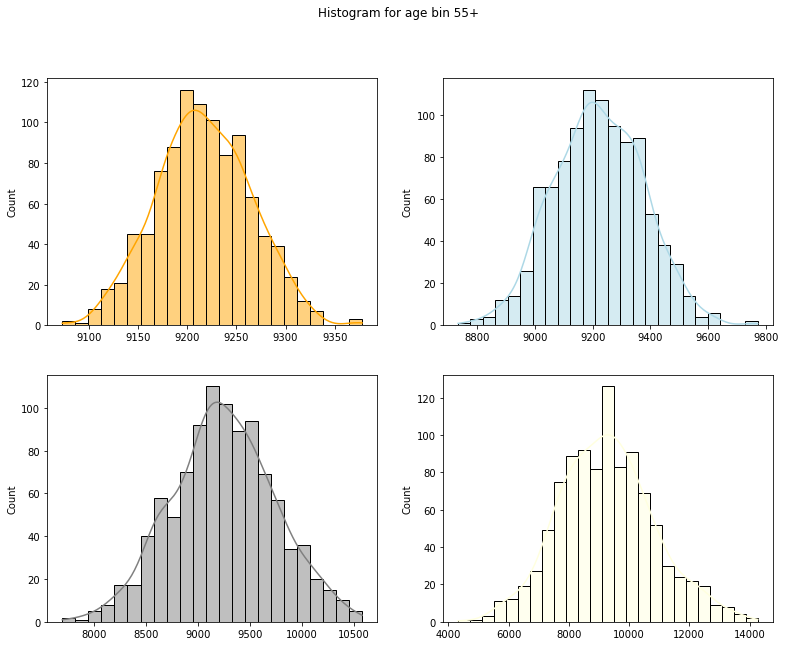

In [129]:
# for 55+

fig,axes = plt.subplots(2,2, figsize= (13,10))
plt.suptitle("Histogram for age bin 55+")
sns.histplot(bootstrap(10000,age_55),ax = axes[0,0], color='orange',kde=True)
sns.histplot(bootstrap(1000,age_55),ax = axes[0,1], color='lightblue',kde=True)
sns.histplot(bootstrap(100,age_55),ax = axes[1,0], color='grey',kde=True)
sns.histplot(bootstrap(10,age_55),ax = axes[1,1], color='lightyellow',kde=True)

plt.show()

In [130]:
num_samples = 100000
sample_means = bootstrap(num_samples,age_55)

low,high = np.round(np.percentile(np.array(sample_means),[5,95]),2)
print("The 90% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[2.5,97.5]),2)
print("The 95% confidence interval for population mean is: [",low,",",high,"]")

low,high = np.round(np.percentile(np.array(sample_means),[0.5,99.5]),2)
print("The 99% confidence interval for population mean is: [",low,",",high,"]")

The 90% confidence interval for population mean is: [ 9192.31 , 9242.74 ]
The 95% confidence interval for population mean is: [ 9187.45 , 9247.57 ]
The 99% confidence interval for population mean is: [ 9181.36 , 9255.63 ]


<br>

---------------------------------------------------------------------------------------------------------------------------

## INSIGHTS

Insights on mean purchase estimation:

 - The 90,95 and 99% confidence intervals for males and females are distinctly different as can be seen from the analysis
 <br><br>
 - The confidence intervals for unmarried and married customers however closely overlap
 <br><br>
 - The 95% confidence intervals for different age bins are as follows:
 <br><br>
         - age 0-17 : [ 8772.97 , 8964.32 ]
         - age 18-25 : [ 9029.89 , 9222.21 ] 
         - age 26-35 : [ 9100.33 , 9285.17 ] 
         - age 36-45 : [ 9156.51 , 9348.96 ] 
         - age 46-50 : [ 9037.53 , 9219.8 ] 
         - age 51-55 : [ 9327.16 , 9520.31 ] 
         - age 55+ [ 9187.45 , 9247.57 ] 
 - This shows that the mean purchase amount of customers belonging to age group 51-55 is the highest and that of 0-17 is the  lowest
    
Insights based on visual analysis:
<br><br>
 - The median spend of males and females are very close to each other with the male median spend being slightly higher
<br><br>
 - For all the age bins, median spend for males is slightly higher than females
 <br><br>
 - A lot of females spend amounts much higher than the median spend (more number of outliers)
 <br><br>
 - Median purchase of males belonging to ages 18-25 and 51-55 are higher
 <br><br>
 - The median spend of customers belonging to city C is higher than those belonging to city A or B
  <br><br>
 - Marital status does not seem to have a heavy impact on the median purchase of customers
   <br><br>
 - We observe that customers belonging to occupation categories 17,12,15 and 8 spend more

-----------------------------------------------------------------------------------------------------------------------------

## RECOMMENDATIONS

 - Since the estimated average spend of female customers is lower than males, Walmart should introduce certain incentives for the females to increase the average spend
<br><br>
 - Walmart should focus on customers who are slightly older (50 and above) as their mean spend is the most amongst all the other age groups
<br><br>
 - Since from the analysis it is observed that customers from city C contribute most to the average purchase amount, Walmart could open more outlets in this city in order to increase their revenue
<br><br>
 - Special coupons given out to customers with occupation categories 17,12,15 and 8 could lead to a rise in mean purchase as  customers belonging to these job categories spend the highest amount
<br><br>
 - Since marital status does not play a significant role in deciding the average purchase, Walmart should focus on both marriedn and unmarried customers equally
 

-------------------------------------------------------------------------------------------------------------------------------